In [1]:
#-----Opening and joining FITS files with CANDELS----- 

#Imported some stuff. 
import numpy as np
from astropy.io import fits, ascii
from astropy.table import Table, join

t = ascii.read("CANDELS_z.txt")


#Function for the main sequence line
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=69.6, Om0=0.286)
dist = cosmo.angular_diameter_distance(t['zbest'])
t['distance'] = dist
t['unitless_dist'] = [0.0]

for i in range(len(t['distance'])): 
    t[i]['unitless_dist'] = np.log10(t[i]['distance'])
t.write('CANDELS_dist.txt', format='ascii.latex', overwrite=True)
    
t

<Table length=2769>
field   ID      M_med     ...       BHAR          distance   unitless_dist
                          ...                       Mpc                   
 str3 int64    float64    ...     float64         float64       float64   
----- ----- ------------- ... ---------------- ------------- -------------
  COS  1855       10.4292 ...   -1.24462916152 1532.61957274 3.18543436753
  EGS 10811        8.8339 ...   -1.00669051552 1533.23180841 3.18560782055
  UDS  6775  10.372912003 ...              0.0 1533.91917147 3.18580247545
  COS 10454       8.49693 ...   -1.42684166152 1534.14796304 3.18586724777
  UDS 24197 10.1760912591 ...   -1.56940812682 1534.90941369 3.18608274965
  COS 14797       9.20137 ...   -1.18530416152 1535.66903962 3.18629762862
  UDS 23927 10.0530784435 ...   -1.57364562682 1538.91472699 3.18721455575
  EGS 17077       10.1782 ...   -1.33634562682 1539.43992794 3.18736274652
  UDS 15468 9.54530711647 ...   -1.70500812682 1539.43992794 3.18736274652
  ...   ...           ... ...              ...           ...           ...
  COS 28850        10.948 ...   -1.08633312682 1731.50176817 3.23842293938
  COS 21860       11.0722 ... -0.0421435380795 1731.50176817 3.23842293938
  EGS 21593       9.76745 ...   -1.15987916152 1731.50176817 3.23842293938
  UDS 26086 10.2718416065 ...  -0.519378015524 1731.25520605 3.23836109238
  GDS 19135         10.05 ...   -1.10902916152 1731.00824003 3.23829913523
  GDS 17813          9.76 ...   -1.27852916152 1730.88460609 3.23826811547
  GDS 26612         10.66 ...  -0.892278015524 1730.88460609 3.23826811547
  EGS  7160          9.39 ...  -0.608365515524 1730.76087182 3.23823706832
  GDS 11665         10.23 ...   -1.27005416152 1730.63703742 3.23820599383
  EGS 16268       10.6622 ...  -0.909228015524 1730.51310311 3.23817489204

In [2]:
#----------Splitting to graph by field------

#Imported some stuff. 
import numpy as np
from astropy.io import fits, ascii
from astropy.table import Table, join

t = ascii.read('CANDELS_dist.txt')
t.sort(['field', 'zbest'])


fbin = [0,650,1665,2081,len(t['field'])]
fields = ['COS','EGS','GDS','UDS']
field_t = [None, None, None, None]
        
for i in range(4): 
    field_t[i] = t[fbin[i]:fbin[i+1]] 
    field_t[i].sort('zbest')
    field_t[i].write(fields[i]+'_dist.txt', format='ascii.latex', overwrite=True)

field_t[0]

/Users/vsong/anaconda/lib/python2.7/site-packages/astropy/table/column.py:1096: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)


<Table masked=True length=650>
field   ID   M_med   zbest  ...       BHAR          distance   unitless_dist
 str3 int64 float64 float64 ...     float64          str14        float64   
----- ----- ------- ------- ... ---------------- ------------- -------------
  COS  1855 10.4292    0.75 ...   -1.24462916152 1532.61957274 3.18543436753
  COS 10454 8.49693   0.752 ...   -1.42684166152 1534.14796304 3.18586724777
  COS 14797 9.20137   0.754 ...   -1.18530416152 1535.66903962 3.18629762862
  COS  2500 10.4122   0.761 ...   -1.02004166152 1540.93563932  3.1877844998
  COS   543 10.5346   0.788 ...   -1.07449051552 1560.43659703  3.1932461273
  COS 27642 9.66947    0.79 ...   -1.62873312682 1561.83097652 3.19363403214
  COS  4869 9.77306    0.79 ...  -0.905209525969 1561.83097652 3.19363403214
  COS  8142 10.3407    0.79 ...   -1.03635301552 1561.83097652 3.19363403214
  COS 24980 10.4451  0.7926 ...   -1.53127062682 1563.63355023 3.19413498033
  COS  5356  10.579  0.7937 ...   -1.04122916152 1564.39274703 3.19434579377
  ...   ...     ...     ... ...              ...           ...           ...
  COS  7154 10.9749     2.2 ...  -0.323459127611 1736.34551679 3.23963615005
  COS 22395 10.2222   2.205 ...   -1.01156666152 1735.74940046 3.23948702392
  COS 27171 10.9596   2.208 ...  -0.581844437611 1735.39041938  3.2393971955
  COS 17056 10.0594  2.2118 ...  -0.392472025969 1734.93430974 3.23928303564
  COS 14161 10.0726   2.214 ...  -0.621078015524 1734.66953541 3.23921675139
  COS 13589 10.5415   2.218 ...  -0.510903015524 1734.18680127 3.23909587653
  COS 21699 10.2853   2.236 ...  -0.935291661519 1731.99367388 3.23854630142
  COS 10289  11.296   2.239 ...  -0.714303015524 1731.62489724 3.23845382146
  COS 21860 11.0722    2.24 ... -0.0421435380795 1731.50176817 3.23842293938
  COS 28850  10.948    2.24 ...   -1.08633312682 1731.50176817 3.23842293938

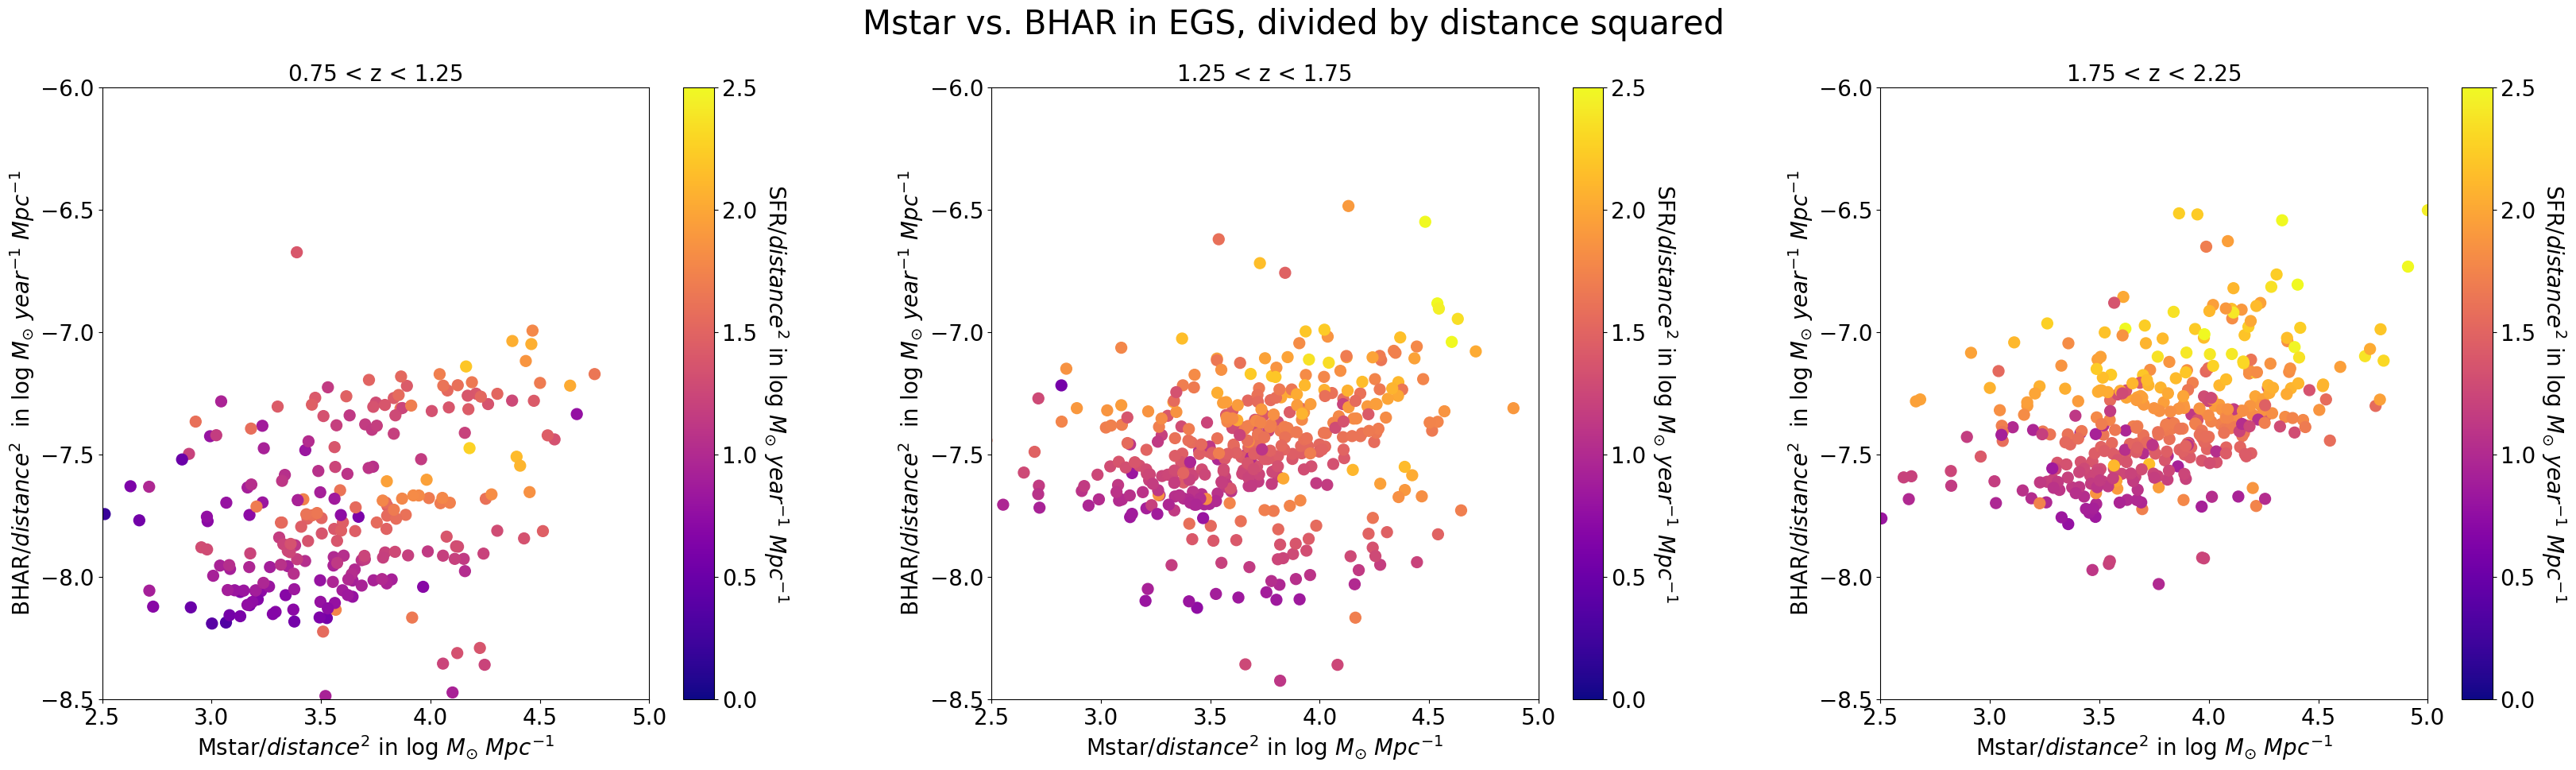

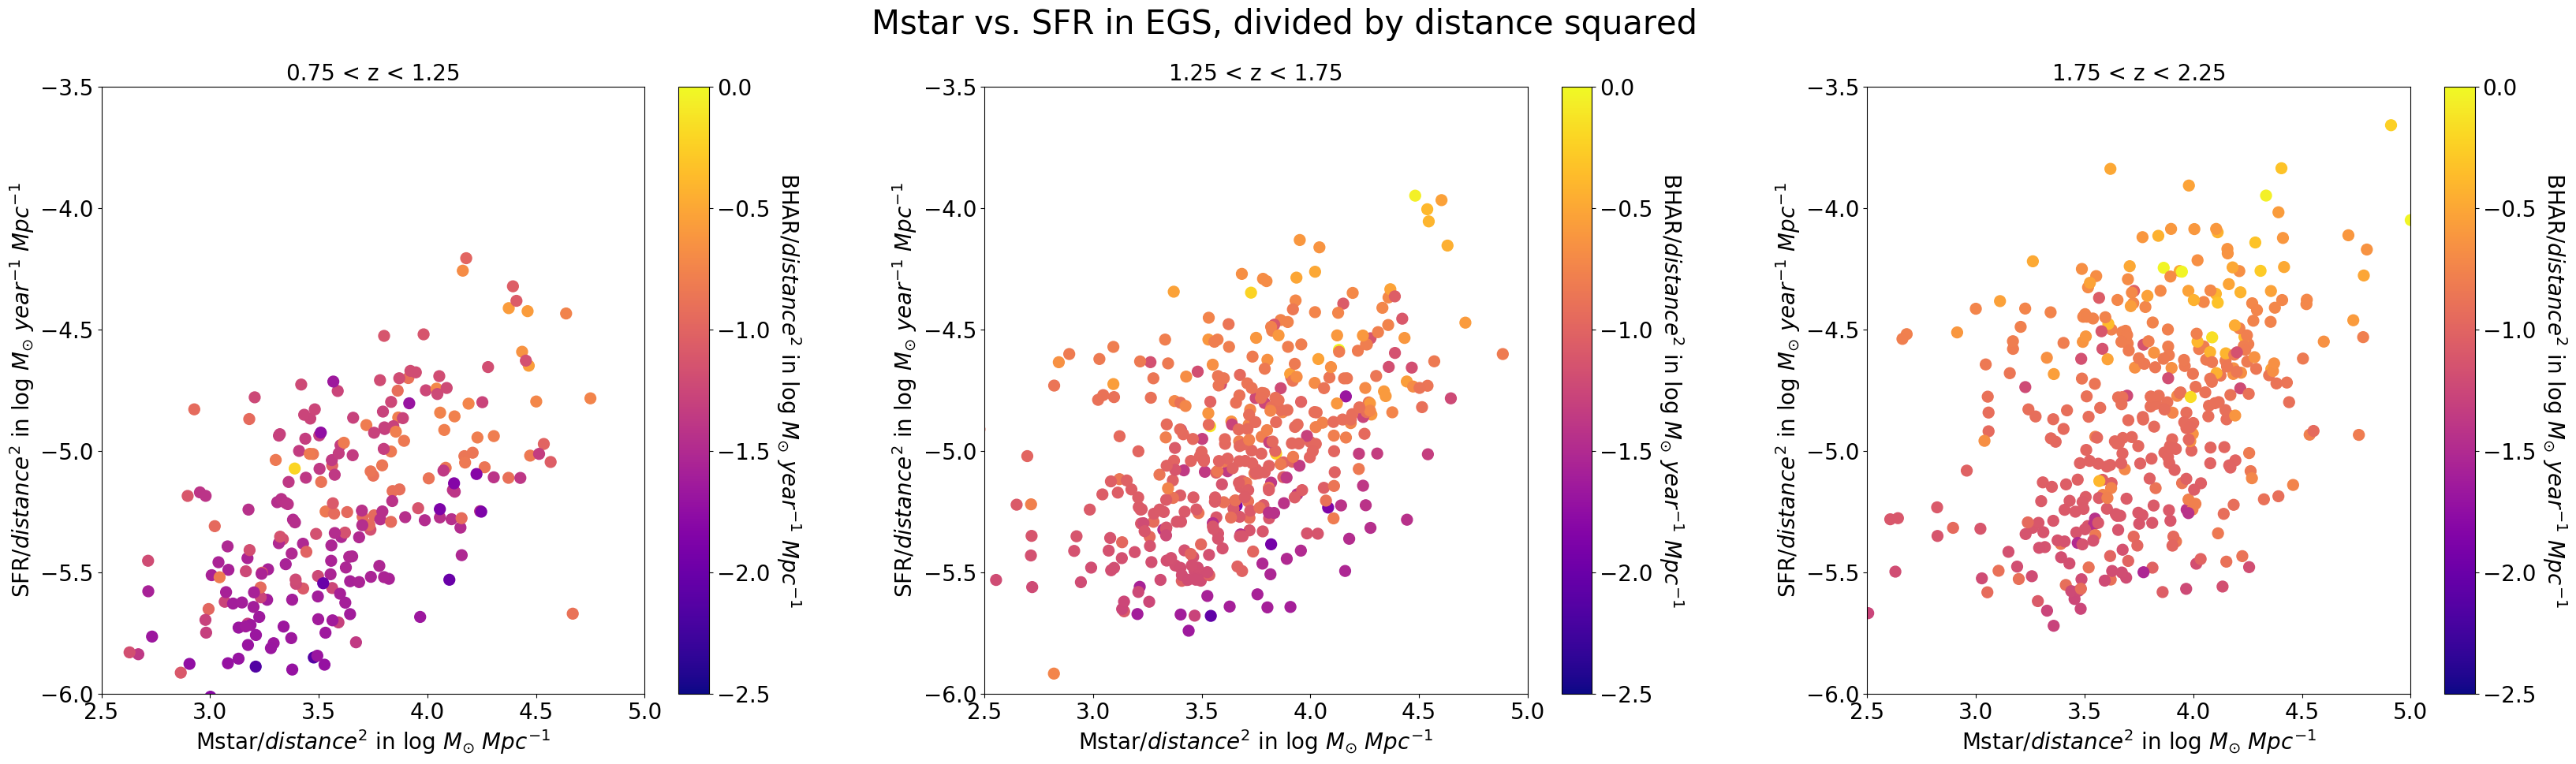

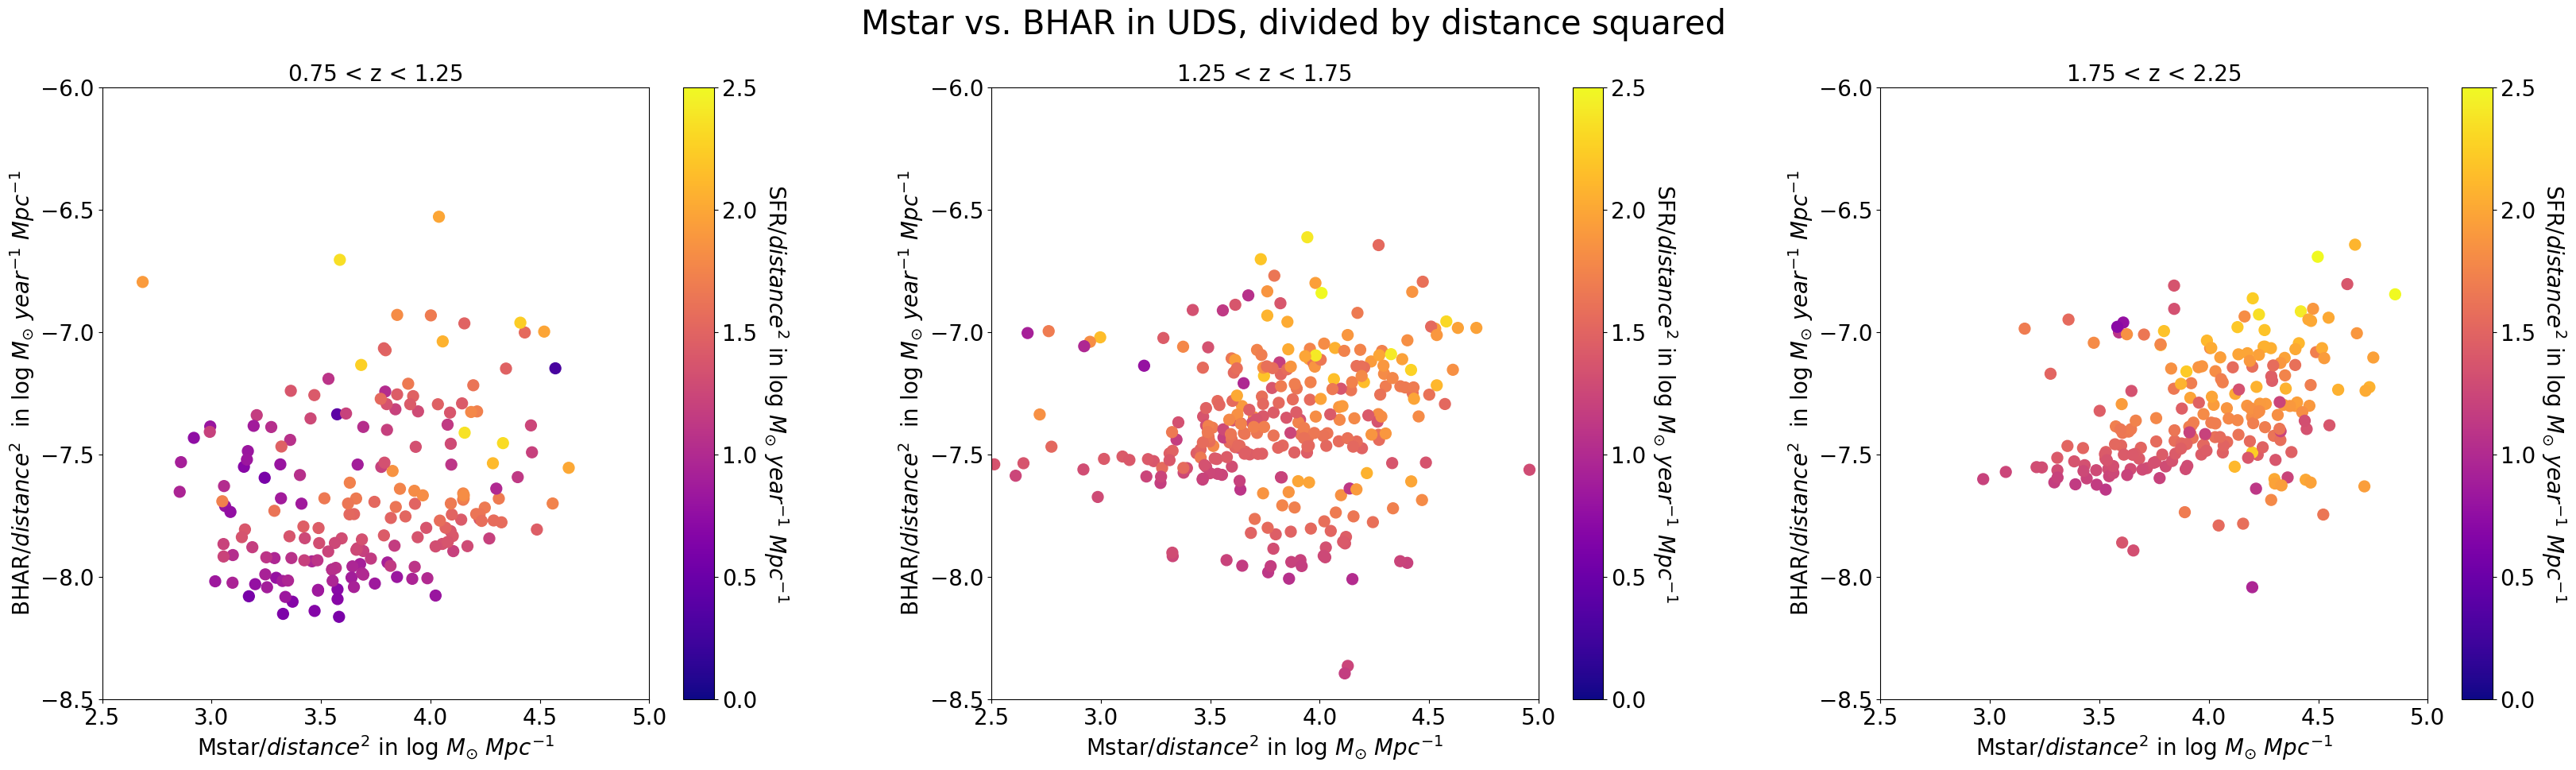

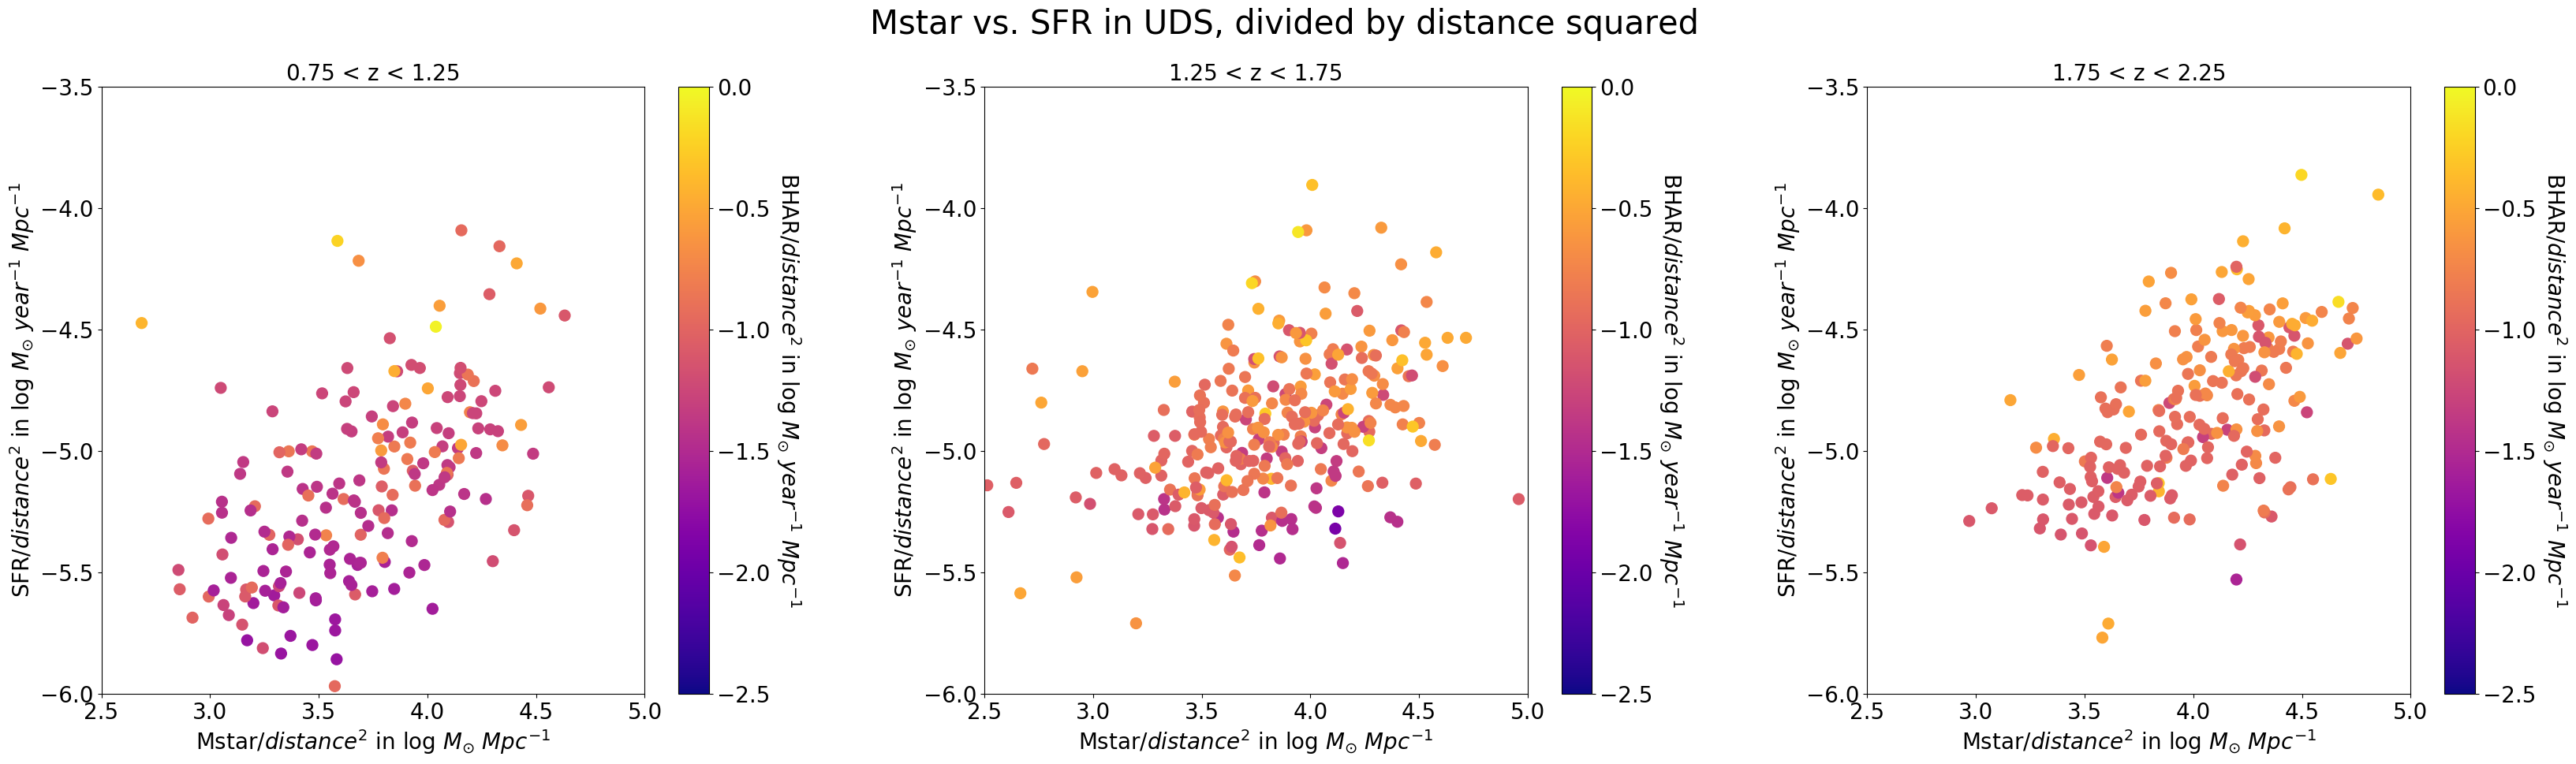

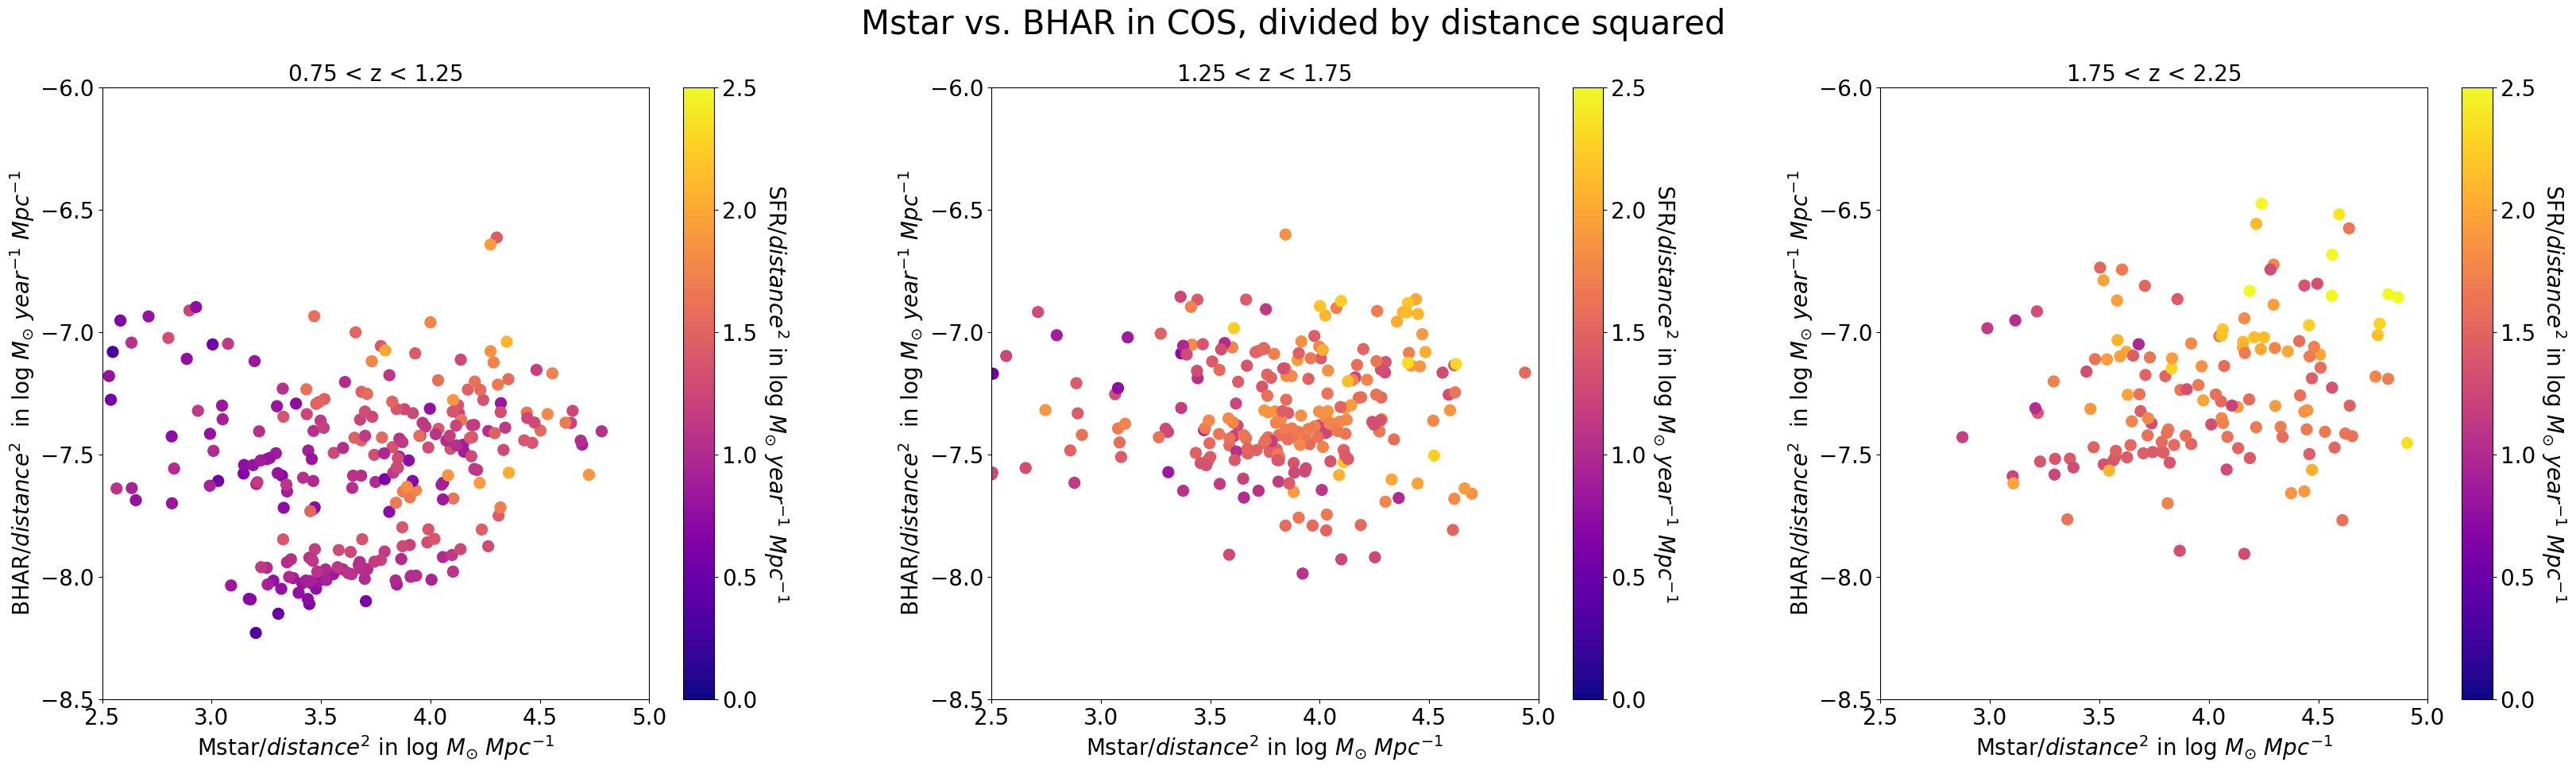

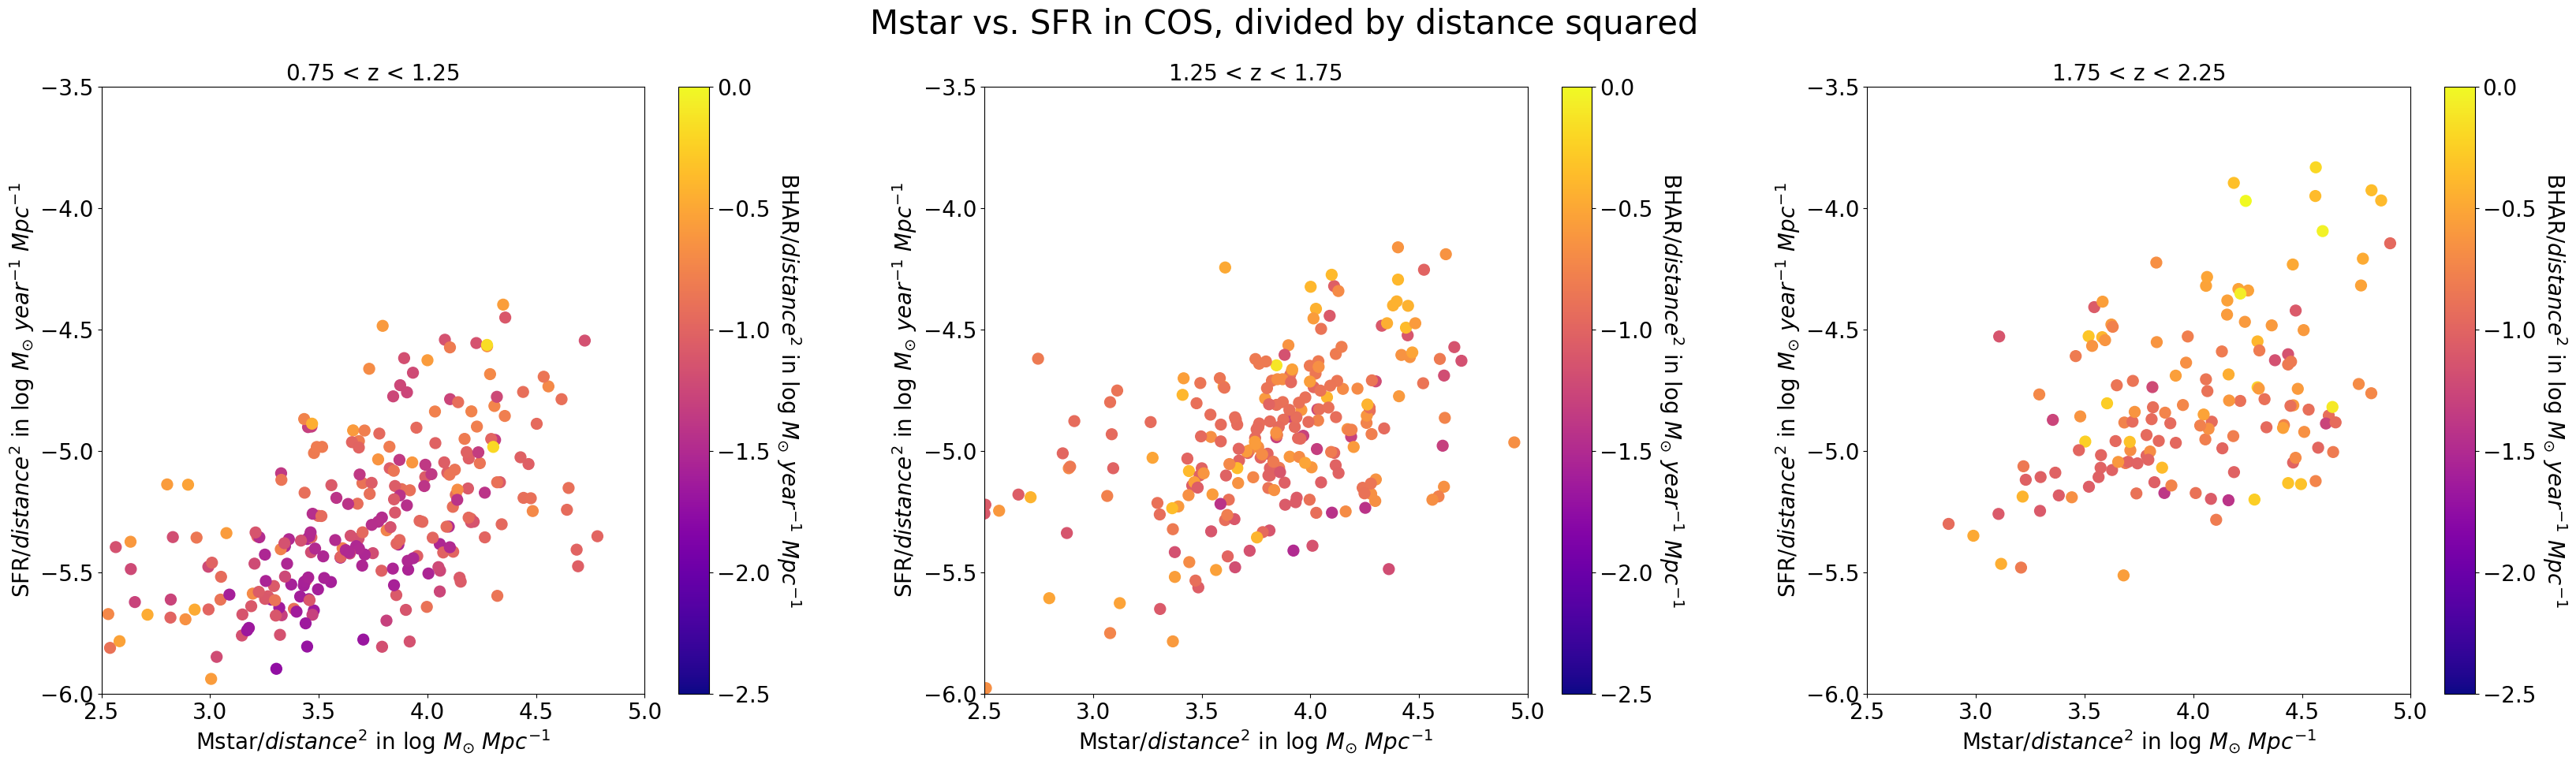

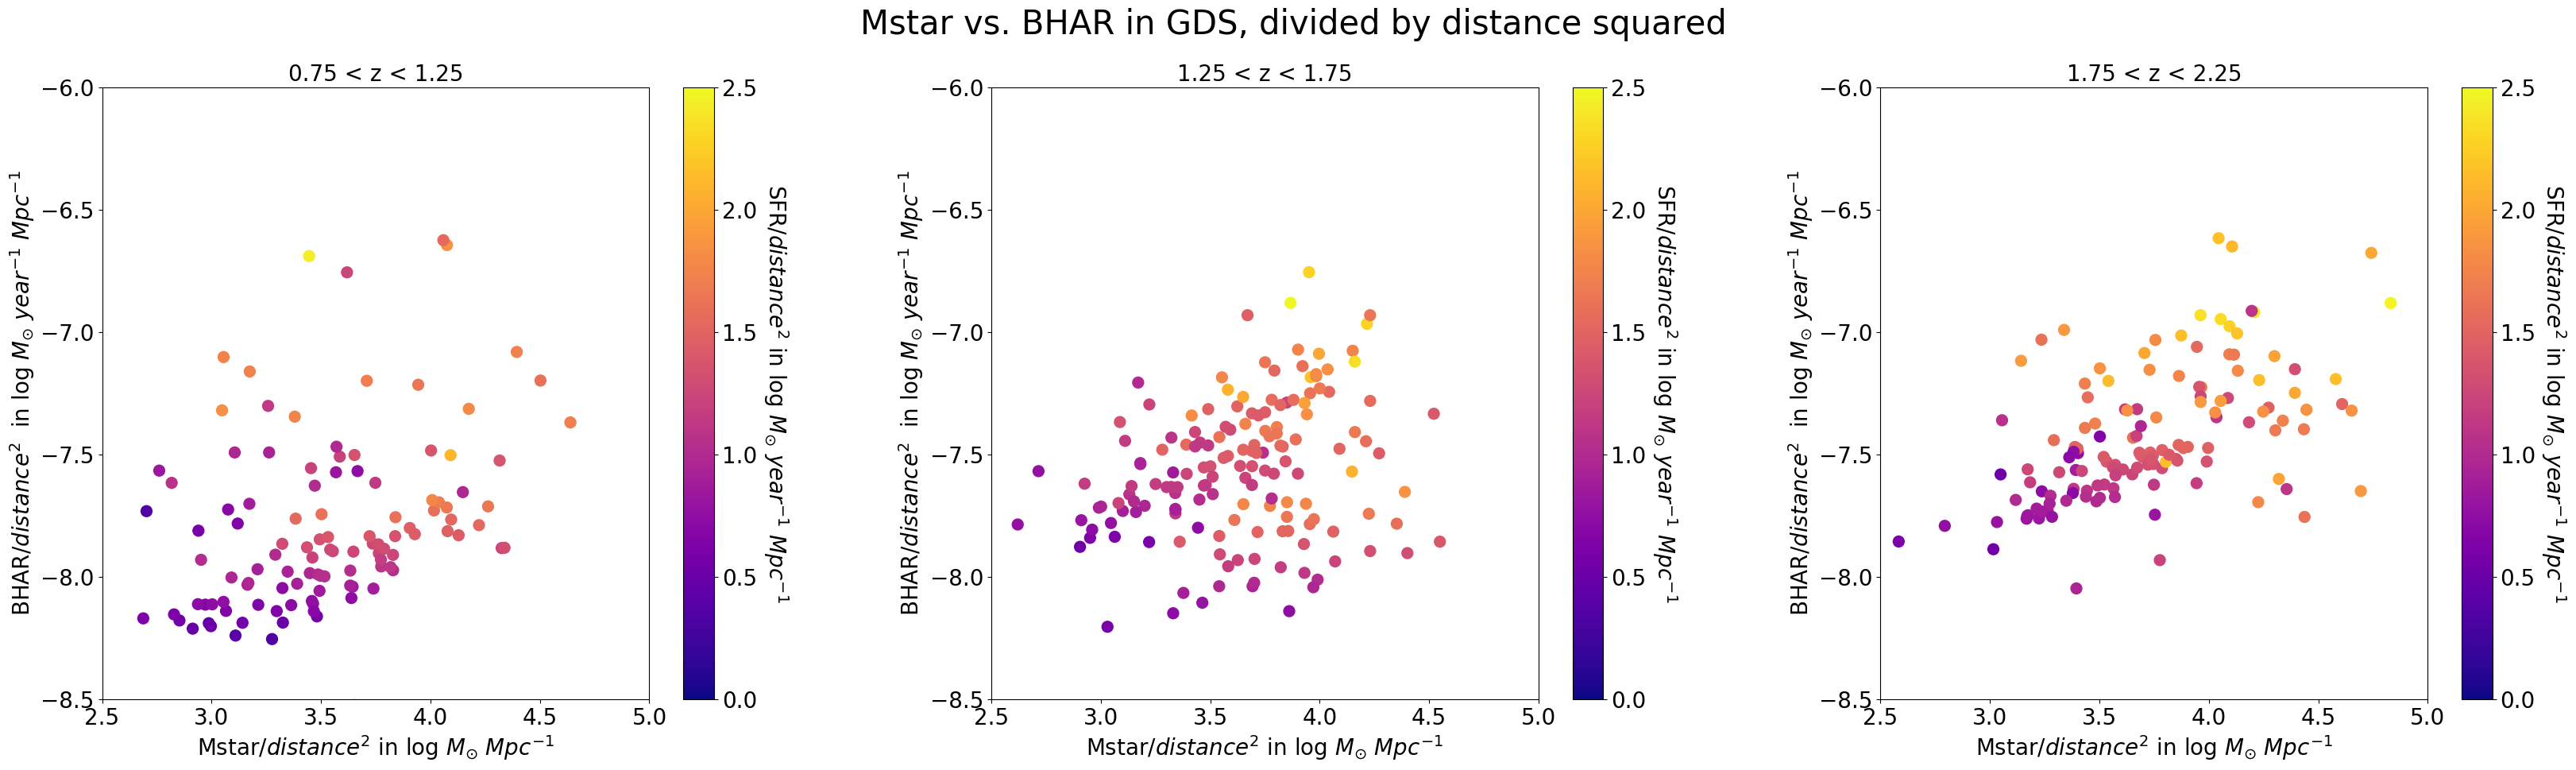

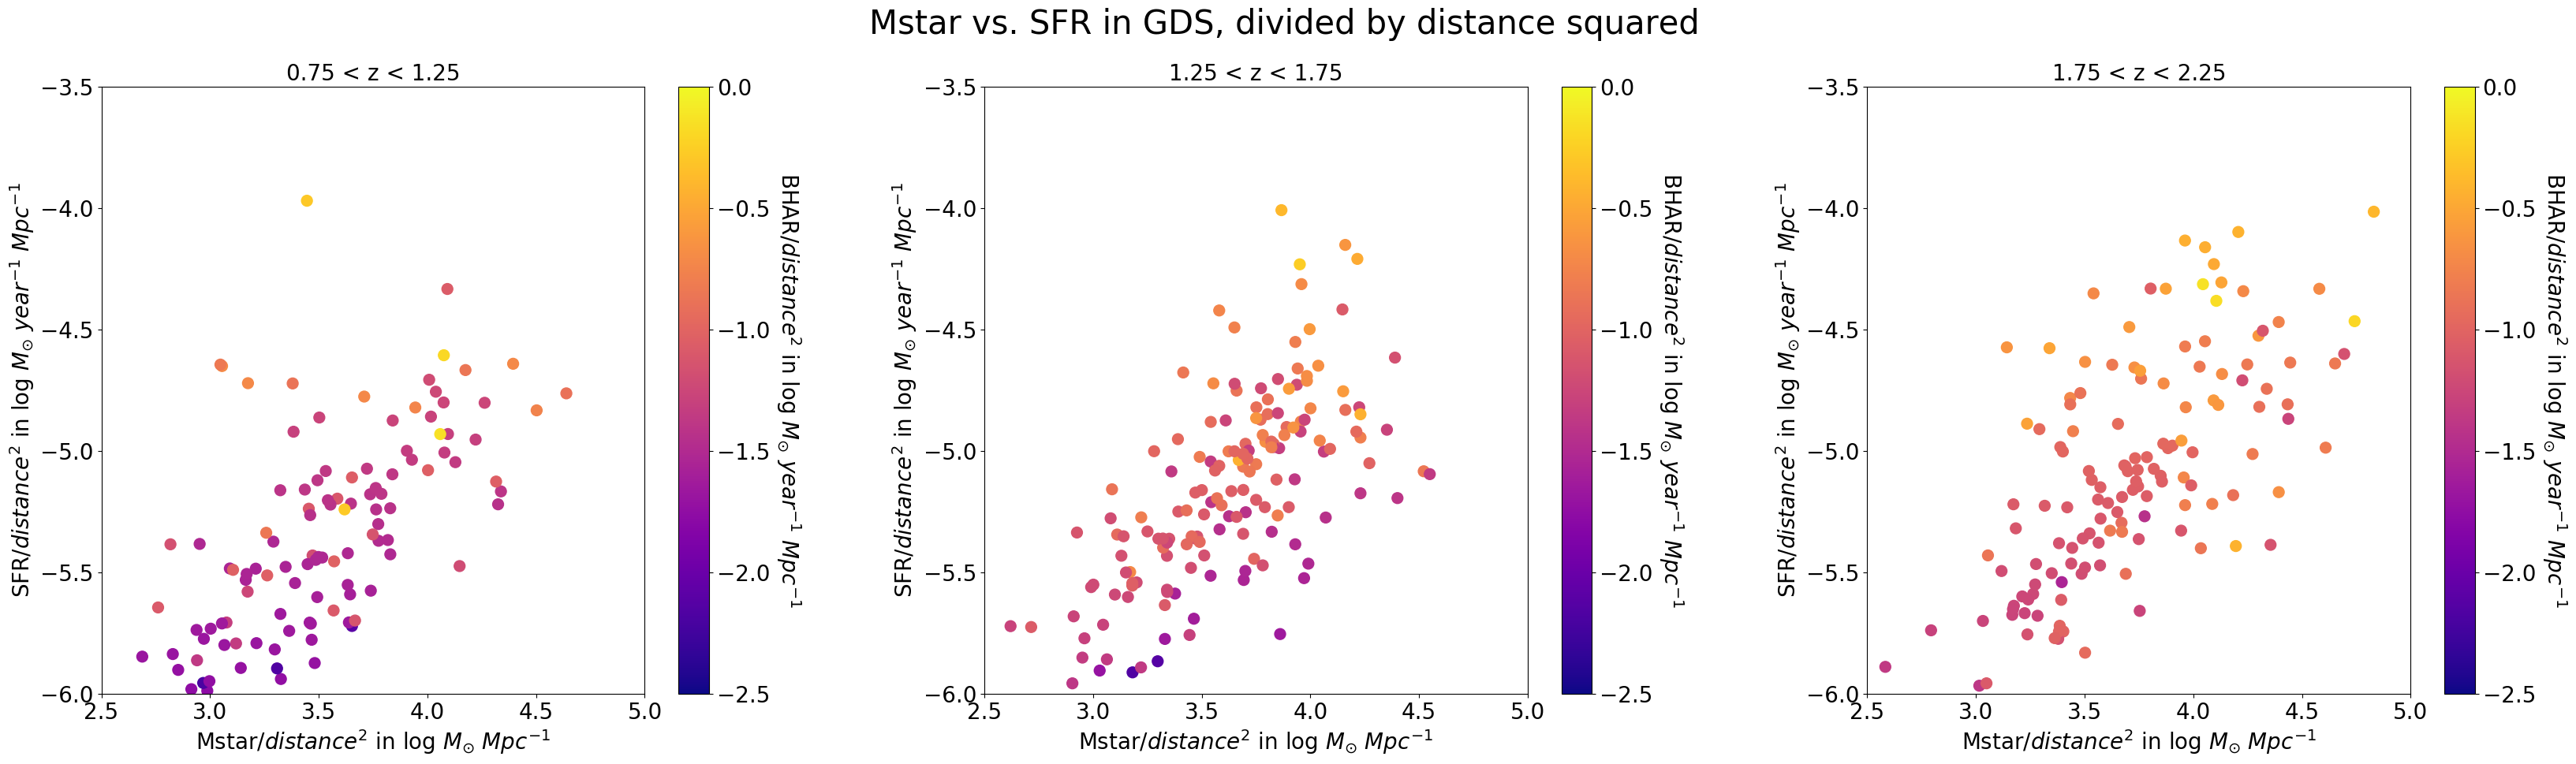

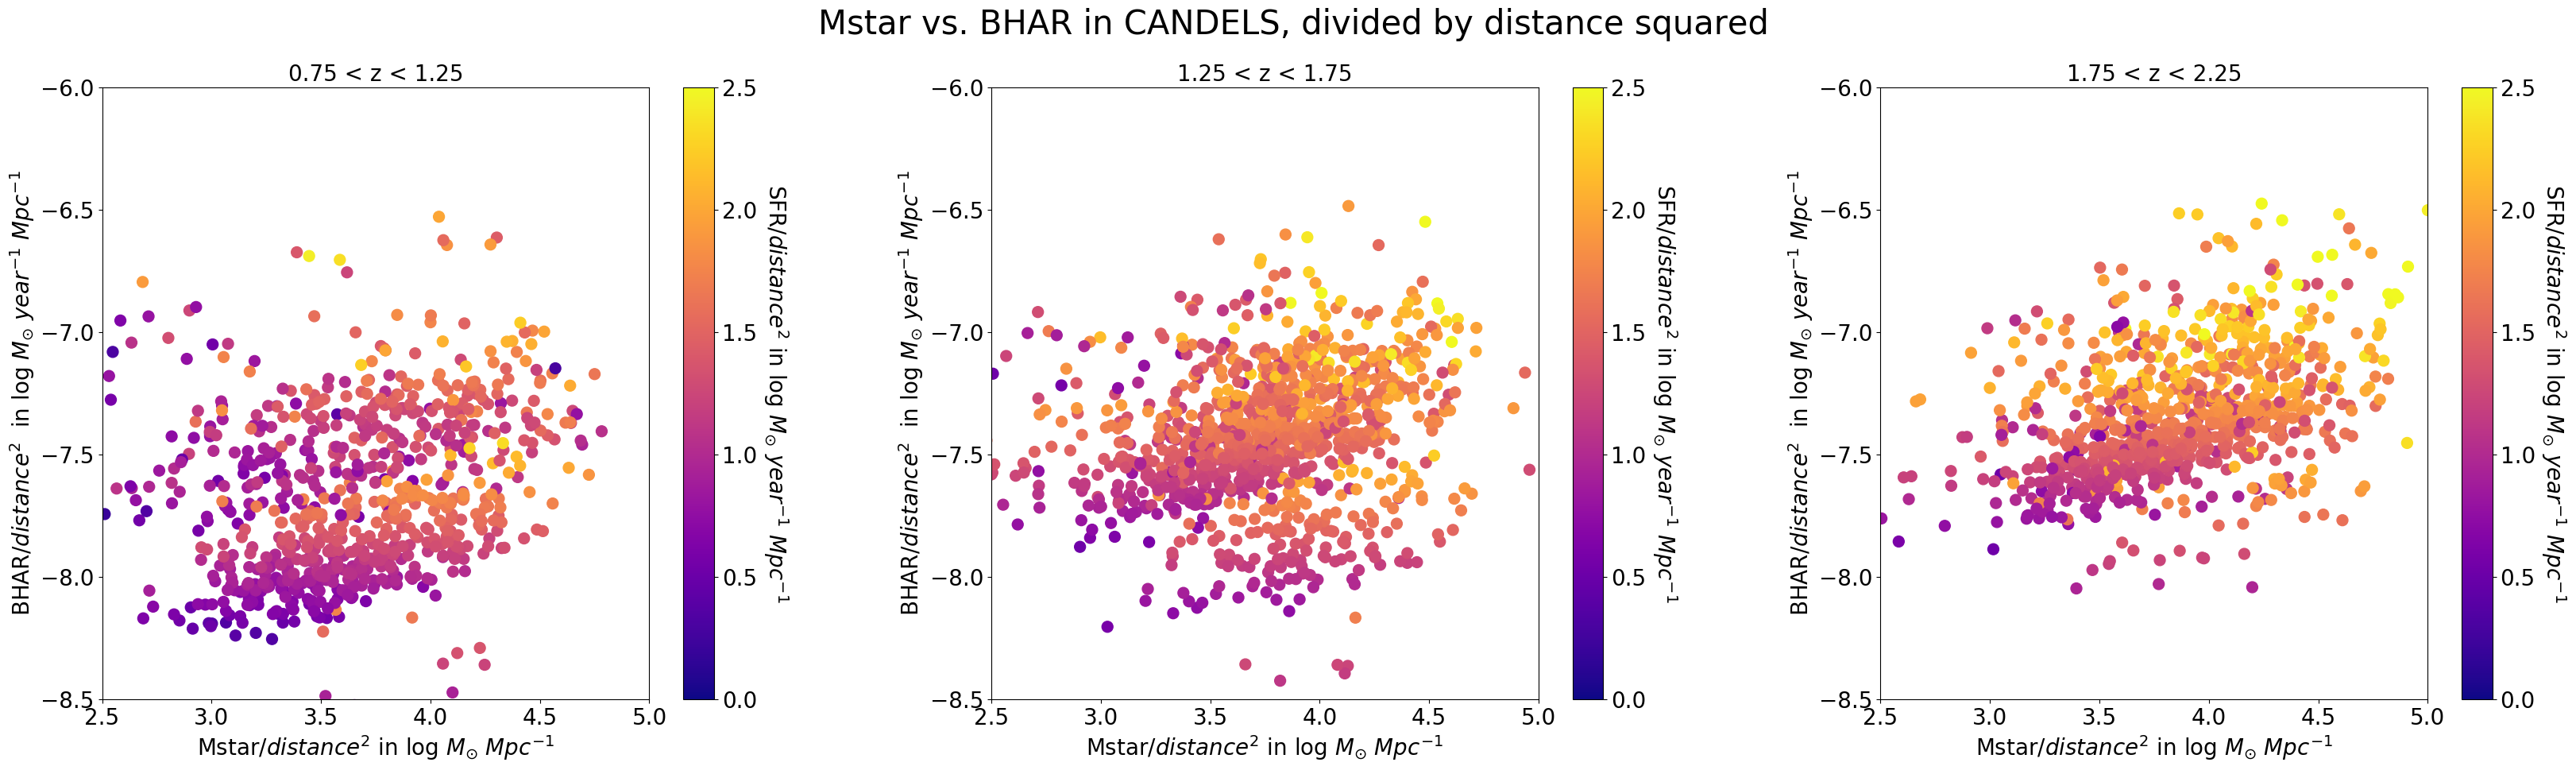

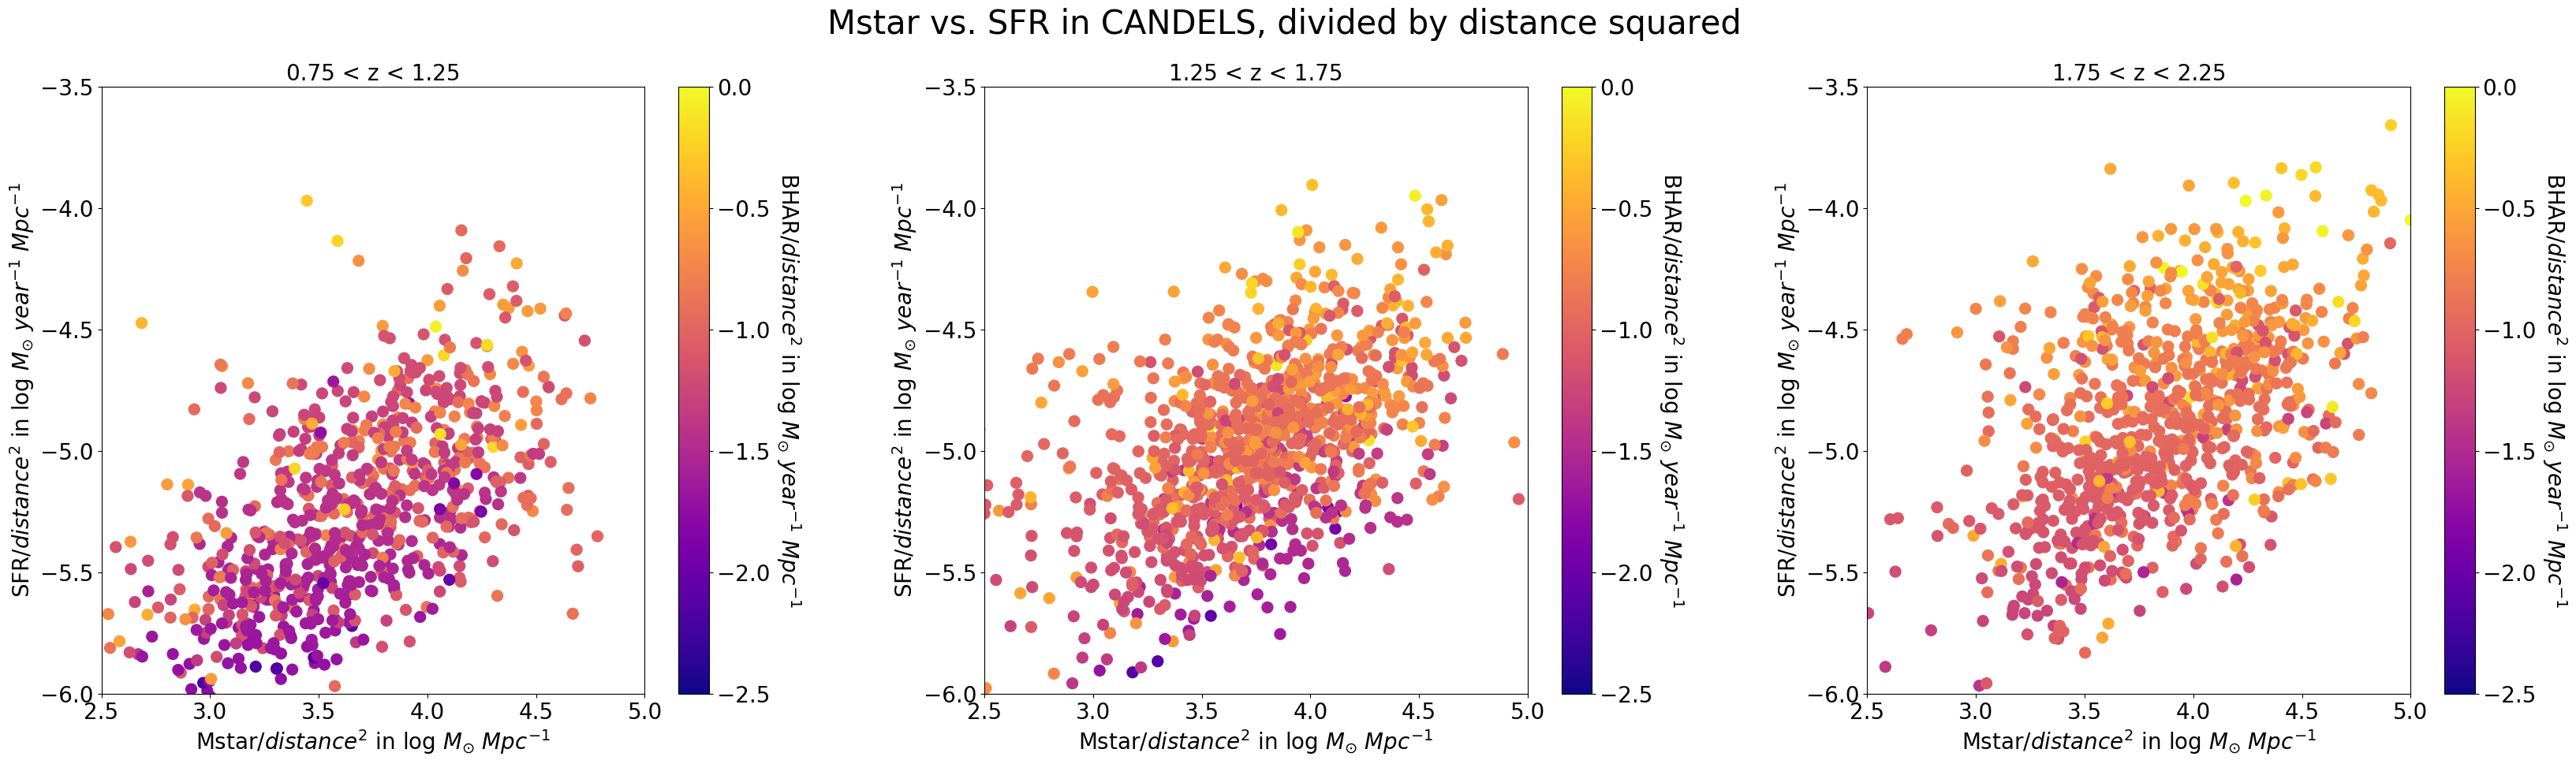

In [1]:
#------------------------SFR, BHAR scatterplots--------------------------------------

#import stuff
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
from astropy.table import Table, join
import numpy as np

%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc")
%matplotlib inline
from matplotlib import cm


#-----------------------Making the function to make graphs---------------------------
def makeFig(k, v, title, 
            x, y, color,
            xlab, ylab, cblab,
            xmin, xmax, 
            ymin, ymax, 
            cb_min, cb_max,
            file_name): 
    
    #Set up the figure
    fig = plt.figure()
    fig.set_size_inches(40,10)
    fig.suptitle(title + ' in ' + k + ', divided by distance squared', fontsize=30)
    
    #What table to use? 
    t = ascii.read(k +'_dist.txt')
    
    #lists
    ax = []
    colorm = []
    scat = []
    cb = []
    titles = ['0.75','1.25','1.75','2.25']
    zbin = v

    for i in range(3): 
        colorm.append(None)
        scat.append(None)
        cb.append(None)

    #Setting up the grid
    for i in range(3):
        #Labels and titles
        ax.append(fig.add_subplot(1, 3, i+1))
        ax[i].set_xlabel(xlab, fontsize=20)
        ax[i].set_ylabel(ylab, fontsize=20)
        ax[i].set_title(titles[i] + ' < z < ' + titles[i+1], fontsize=20)

        #Axis limits
        ax[i].set_xlim(xmin, xmax)
        ax[i].set_ylim(ymin, ymax)
        
        #t[zbin[i]:zbin[i+1]][x]
        #The data
        colorm[i] = t[zbin[i]:zbin[i+1]][color]
        scat[i]=ax[i].scatter(t[zbin[i]:zbin[i+1]][x] - 2*t[zbin[i]:zbin[i+1]]['unitless_dist'], 
                              t[zbin[i]:zbin[i+1]][y] - 2*t[zbin[i]:zbin[i+1]]['unitless_dist'],
                              s=100,c=colorm[i],vmin=cb_min,vmax=cb_max,cmap=cm.plasma)

        cb[i] = fig.colorbar(scat[i], ax=ax[i])
        cb[i].set_label(cblab, rotation=270, labelpad=30, fontsize=20)

        #Tick mark label size
        ax[i].tick_params(axis='both', which='major', labelsize=20)
        cb[i].ax.tick_params(labelsize=20) 

    #Tune spacing between plots. 
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

    fig.savefig(k+'_'+file_name+'_dist.png', dpi=300, bbox_inches='tight')



#----------------------------Calling the function to make graphs------------------------------------

#A dictionary of names and zbins
names = {'CANDELS': [0,812,1898,2769],
         'COS': [0,265,507, 650], 
         'EGS': [0,241,640,1015], 
         'GDS': [0,119,279,416],
         'UDS': [0,187,472,688]}


for k, v in names.items():
    
    #1. Mstar vs. BHAR
    makeFig(k, v, 'Mstar vs. BHAR', 
            'M_med', 'BHAR', 'sfr',
            'Mstar/${distance^{2}}$ in log $M_{\odot}$ ${Mpc^{-1}}$', 'BHAR/${distance^{2}}$  in log $M_{\odot}$ ${year^{-1}}$ ${Mpc^{-1}}$', 'SFR/${distance^{2}}$ in log $M_{\odot}$ ${year^{-1}}$ ${Mpc^{-1}}$',
            2.5, 5, 
            -8.5, -6, 
            0, 2.5,
            'Mstar_BHAR') 
    
    #2. Mstar vs. SFR
    makeFig(k, v, 'Mstar vs. SFR', 
            'M_med', 'sfr', 'BHAR',
            'Mstar/${distance^{2}}$ in log $M_{\odot}$ ${Mpc^{-1}}$', 'SFR/${distance^{2}}$ in log $M_{\odot}$ ${year^{-1}}$ ${Mpc^{-1}}$', 'BHAR/${distance^{2}}$ in log $M_{\odot}$ ${year^{-1}}$ ${Mpc^{-1}}$',
            2.5, 5,  
            -6, -3.5,
            -2.5, 0,
            'Mstar_SFR')

In [ ]:
#----------------Different figures you can make. Just copy + paste into code above.--------

cols = ['M_med', 'BHAR', 'sfr']

labs = ['Mstar in log $M_{\odot}$', 
            'BHAR in log $M_{\odot}$ ${year^{-1}}$', 
            'SFR in log $M_{\odot}$ ${year^{-1}}$',
            'BHAR/Mstar in log ${year^{-1}}$', 
            'Specific SFR in log ${year^{-1}}$']

file_name = ['Mstar_BHAR', 
          'Mstar_SFR', 
          'Mstar_sBHAR',
          'Mstar_sSFR',
          'sBHAR_SFR',
          'sBHAR_sSFR']

mstar_lim = [9,12]
bhar_lim = [-2.5, 0]
sfr_lim = [0,2.5]
sbhar_lim = [-13, -9.5]
ssfr_lim = [-10, -7.5]

 
    
    #3. Mstar vs. BHAR/Mstar
    makeFig(k, v, 'Mstar vs. BHAR/Mstar', 
            'M_med', 'BHAR', 'sfr',
            'Mstar in log $M_{\odot}$', 'BHAR/Mstar in log ${year^{-1}}$', 'SFR/Mstar in log ${year^{-1}}$',
            9, 12,  
            -13, -9.5,
            -10, -7.5,
            'Mstar_sBHAR') 
    
    #4. Mstar vs. sSFR
    makeFig(k, v, 'Mstar vs. BHAR/Mstar', 
            'M_med', 'sfr', 'BHAR',
            'Mstar in log $M_{\odot}$', 'SFR/Mstar in log ${year^{-1}}$', 'BHAR/Mstar in log ${year^{-1}}$',
             9, 12,  
            -10, -7.5,
            -13, -9.5,
            'Mstar_sSFR')
    
    #5. BHAR/Mstar vs. SFR
    makeFig(k, v, 'BHAR/Mstar vs. SFR', 
            'BHAR', 'sfr', 'M_med',
            'BHAR/Mstar in log ${year^{-1}}$', 'SFR in log $M_{\odot}$ ${year^{-1}}$', 'Mstar in log $M_{\odot}$', 
            -13, -9.5,  
            0,2.5,
            9, 12,
            'sBHAR_SFR') 

    #6. BHAR/Mstar vs. sSFR
    makeFig(k, v, 'BHAR/Mstar vs. SFR', 
            'BHAR', 'sfr', 'M_med',
            'BHAR/Mstar in log ${year^{-1}}$', 'SFR/Mstar in log ${year^{-1}}$', 'Mstar in log $M_{\odot}$', 
            -13, -9.5,  
            -10, -7.5,
            9, 12,
            'sBHAR_sSFR') 